In [1]:
# Climada damage assessment

# Assets: LitPop 1 1, Litpop 3 1, Litpop 2 1, Litpop 0 1 
# 1 Tropical cyclones in Philippines
# 1.1 Single Events: Strongest cyclones 2010 - 2020
# 1.2 Probabilistic Events (3 strongest typhoons)
# 1.3 Probabilistic Events 1990-2020 basin = NA, 5 synth. tracks
# 1.4 Probabilistic Events with Climate change impact
# 2 Surge with SLOSH


# 2.1 Probabilistic Events with Climate change impact
# 3 Surge with GeoClaw (validation)
# 4 River Flood
# 5 

import pandas as pd
import numpy as np
import os.path
from climada import *
from climada.entity import *
from climada.hazard import *
from climada.entity import Exposures
from climada.hazard import Hazard
from climada.entity import Exposures, ImpactFuncSet
from climada.engine import Impact

2021-03-15 21:39:32,515 - climada - DEBUG - Loading default config file: /Users/zhangwenlan/miniconda3/climada_python-1.5.1/climada/conf/defaults.conf


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Set working directory and subfolders

In [2]:
# https://climada-python.readthedocs.io/en/stable/tutorial/1_main_climada.html#Adaptation-options-appraisal
wd     = "/Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/"

Output = "Data/Output/"
Input  = "Data/Input/"

exposure_litpop  = "LitPop/"         # done
surges_bathtub   = "SloshSurge/"     # input waiting from wenlan
surges_river     = "Riversurge/"     # input waiting from wenlan -> could be moved to TIM
tropicalcyclone  = "TropicalCyclone/"# done

In [3]:
LP = "_LP11"       # Filename extension for the LitPop File to be used (11 would be Lit = 1 and Pop = 1)
year = "_y2020"    # Filename extension for the reference year for climate change applied
track = "_tr3012"  # track amount (in this case it will be 3012)
res = "_res_001"   # resolution of the cells (centroid resolution)

In [6]:
# Some statistics for the hazards

# hazard = haz2020wind

# helping functions
def varse(a, axis=None):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

def stds(a, axis=None):
    """ Standard deviation of sparse matrix a
    std = sqrt(var(a))
    """
    return np.sqrt(vars(a, axis))

# actual results

print("-----------------Mean-----------------")
print("Mean of 2020 Wind = " + str(haz2020wind.intensity[haz2020wind.intensity > 0].mean()))
# print(haz2080surge.intensity[haz2100surge.intensity>0].mean())
print("Mean of 2050 Wind = " + str(haz2050wind.intensity[haz2020wind.intensity > 0].mean()))
# print(haz2040surge.intensity[haz2100surge.intensity>0].mean())
print("Mean of 2100 Wind = " + str(haz2100wind.intensity[haz2020wind.intensity > 0].mean()))
print("Mean of 2020 Surge = " + str(haz2020surge.intensity.mean()))

print("-----------------Max-----------------")
print("Max of 2020 Wind = " + str(haz2020wind.intensity.max()))
# print(haz2080surge.intensity.max())
print("Max of 2050 Wind = " + str(haz2050wind.intensity.max()))
# print(haz2040surge.intensity.max())
print("Max of 2100 Wind = " + str(haz2100wind.intensity.max()))
print("Max of 2020 Surge = " + str(haz2020surge.intensity.max()))

print("-----std---------")
#stds(hazard.intensity)

-----------------Mean-----------------


NameError: name 'haz2020wind' is not defined

## Hazard Wind - Tropical Cyclone

In [8]:
HazMean = []
for i in range(0,4):
    tmp = i
    HazMean.append(tmp)

In [9]:
print(HazMean)

[0, 1, 2, 3]


### Check hazard statistics

In [17]:
# Load harzard h5 files (tropical cyclones, storm surges. etc)
Year = [2020, 2050, 2100]
HazMean = []
HazMax = []
for y in Year:
    haz = Hazard("TC")
    haz.read_hdf5(wd + Input + tropicalcyclone + "TC_HTI_001_3012tr_" + str(y) + ".h5")
    TmpMean = haz.intensity[haz.intensity > 0].mean()
    HazMean.append(TmpMean)
    TmpMax = haz.intensity.max()
    HazMax.append(TmpMax)
    # Statistics for the hazards
    print("Mean of " + str(y) + " wind hazard = " + str(TmpMean))
    print("Max of " + str(y) + " wind hazard = " + str(TmpMax))    

2021-03-15 22:34:28,359 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2020.h5
Mean of 2020 wind hazard = 25.024978192827994
Max of 2020 wind hazard = 73.75393696767716
2021-03-15 22:34:28,650 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2050.h5
Mean of 2050 wind hazard = 25.818840255186107
Max of 2050 wind hazard = 76.27509610394692
2021-03-15 22:34:28,982 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2100.h5
Mean of 2100 wind hazard = 26.086733074040502
Max of 2100 wind hazard = 77.1258741670648


Text(0.5, 1.0, 'Max of Hazard in different prediction')

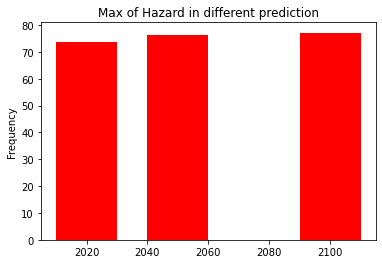

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
HazMaxFig = ax.bar(Year, HazMax, width = 20, color='r')
ax.set_ylabel('Impact')
ax.set_xlabel('Year')
ax.set_title('Max of Hazard')

Text(0.5, 1.0, 'Mean of Hazard')

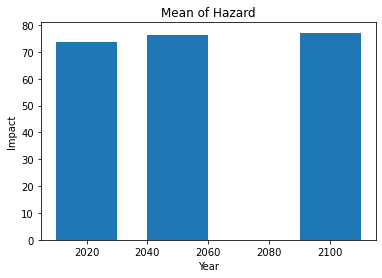

In [58]:
fig, ax = plt.subplots()
HazMaxFig = ax.bar(Year, HazMax, width = 20)
ax.set_ylabel('Impact')
ax.set_xlabel('Year')
ax.set_title('Mean of Hazard')
# fig.supxlabel('Year')   ？
# fig.supylabel('Impact')
# fig.suptitle("Mean of Hazard")

### Plot strongest event & Export data

2021-03-05 10:06:01,021 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2020.h5


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


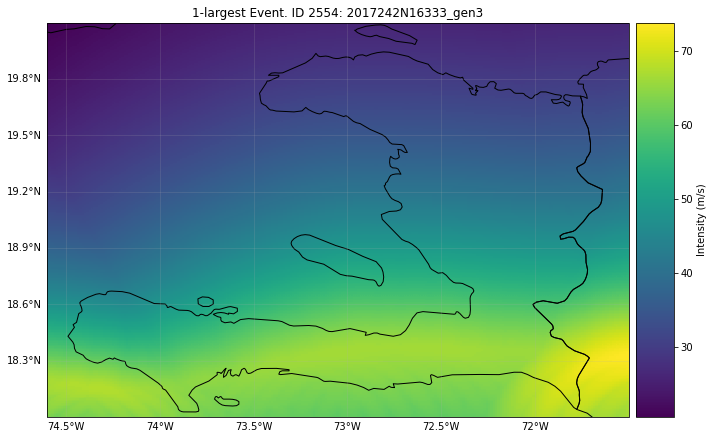

In [8]:
# Select Year: 2020, 2050, 2100
year = 2020
haz = Hazard("TC")
haz.read_hdf5(wd + Input + tropicalcyclone + "TC_HTI_001_3012tr_" + str(year) + ".h5")
strong = haz.plot_intensity(-1) # Strognest 
strong.figure.savefig(wd + Output + tropicalcyclone + "Strongest"  + str(year) + ".tif")
# Export data with other format
#     strong.figure.savefig(wd + Output + tropicalcyclone + "Strongest" + str(y) + ".svg")
#     strong.figure.savefig(wd + Output + tropicalcyclone + "Strongest" + str(y) + ".png")

## Exposures - Litpop

2021-03-05 10:06:07,193 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/LitPop/LP_HTI_2020_0_1.h5
2021-03-05 10:06:07,307 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.
2021-03-05 10:06:18,784 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/LitPop/LP_HTI_2020_0_2.h5
2021-03-05 10:06:18,851 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.
2021-03-05 10:06:29,893 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/LitPop/LP_HTI_2020_1_0.h5
2021-03-05 10:06:29,953 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.
2021-03-05 10:06:41,046 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assess

<Figure size 432x288 with 0 Axes>

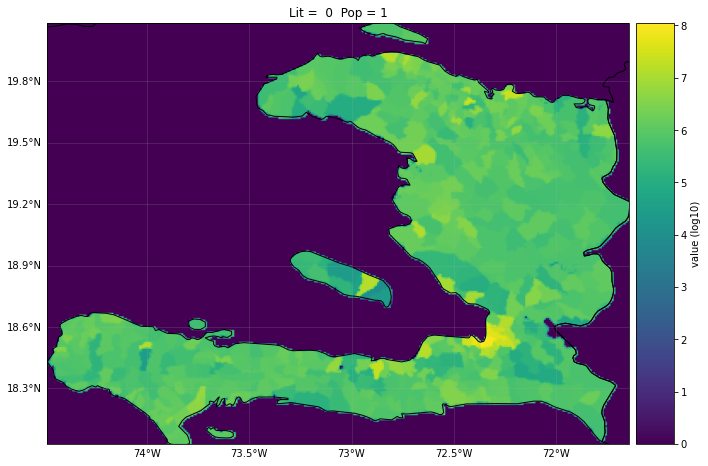

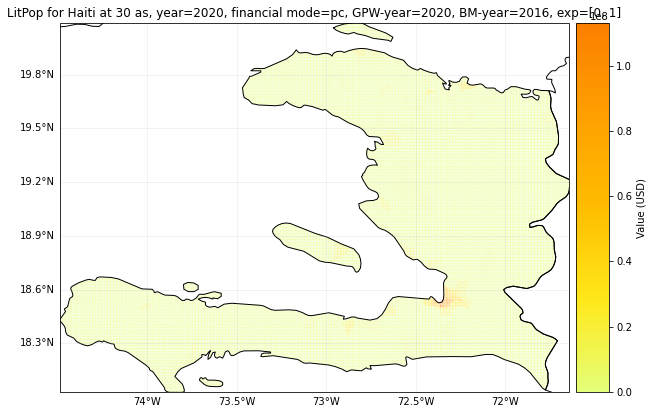

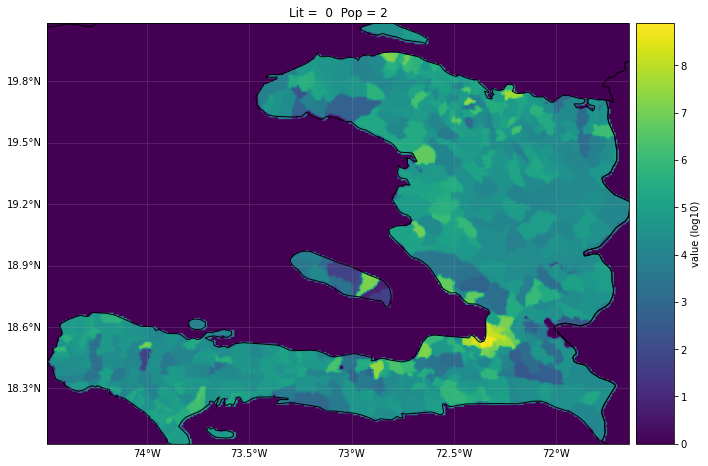

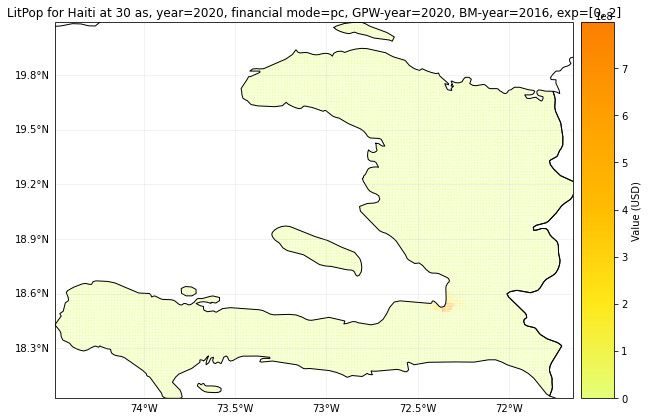

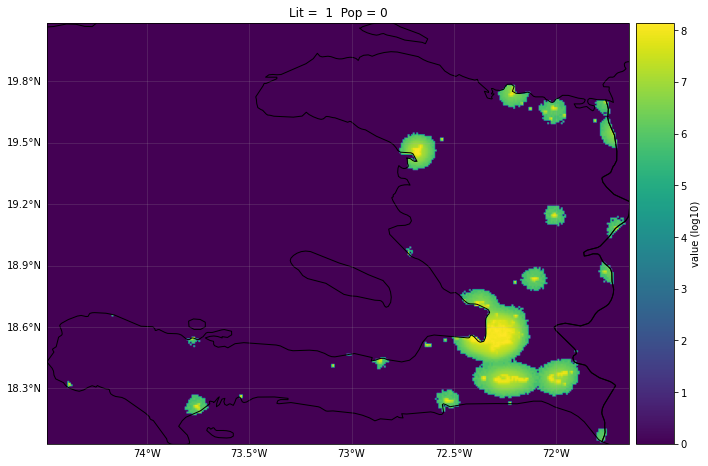

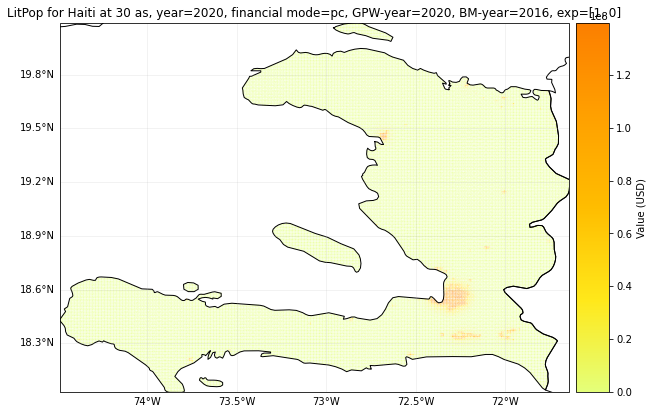

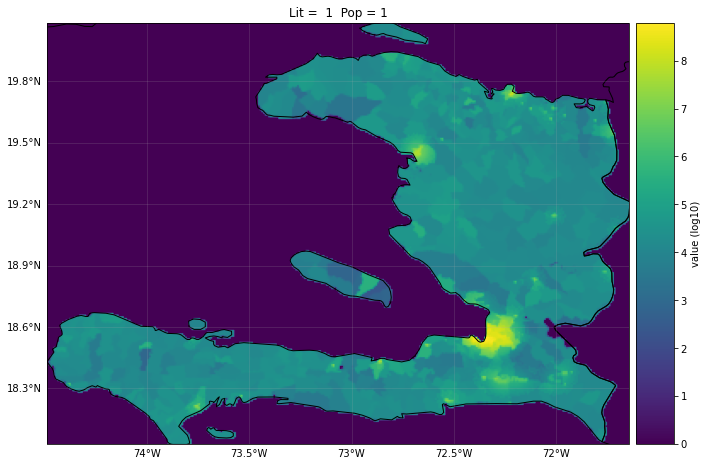

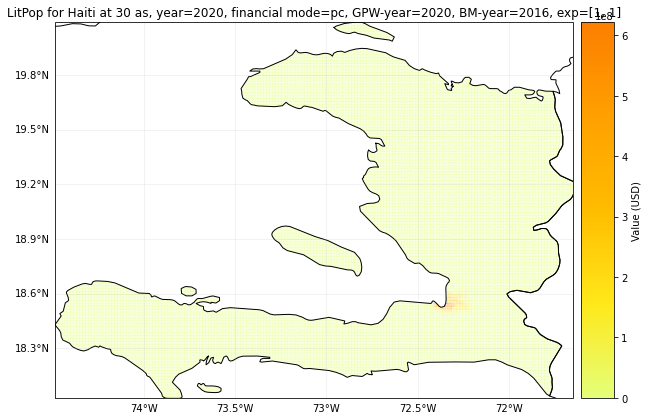

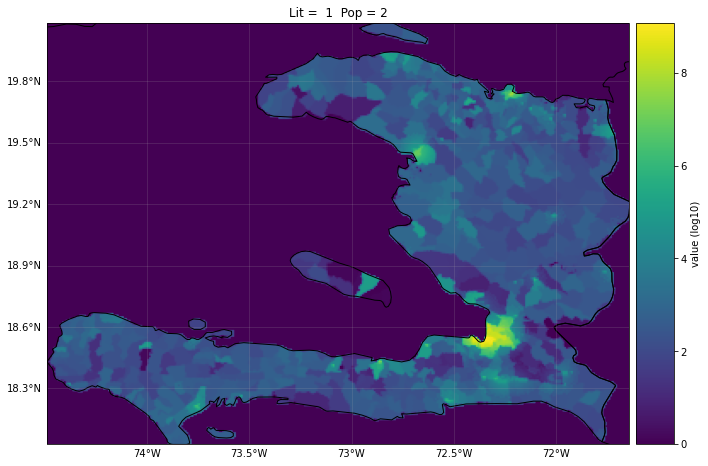

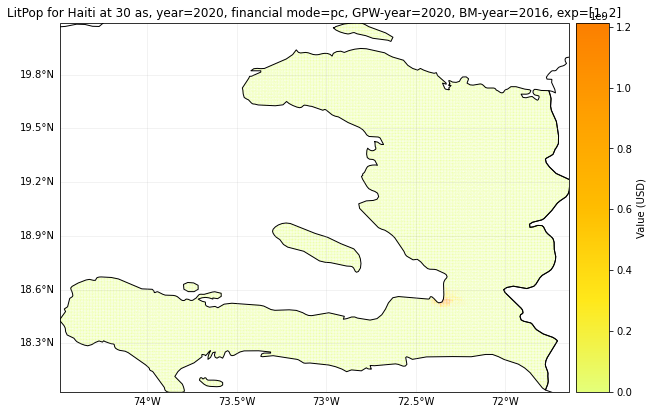

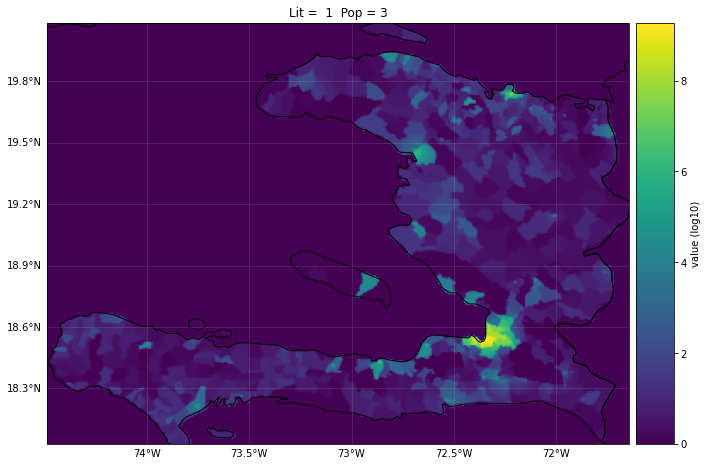

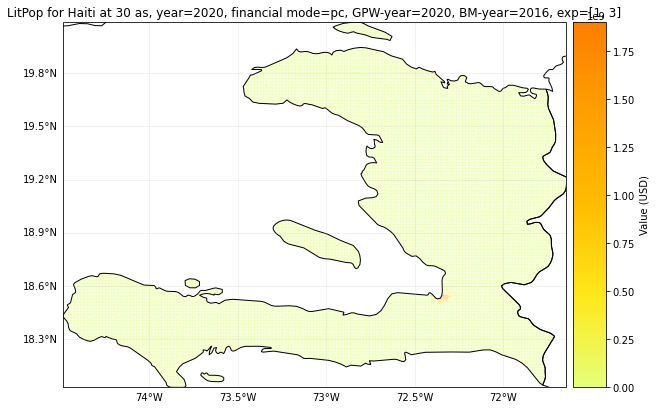

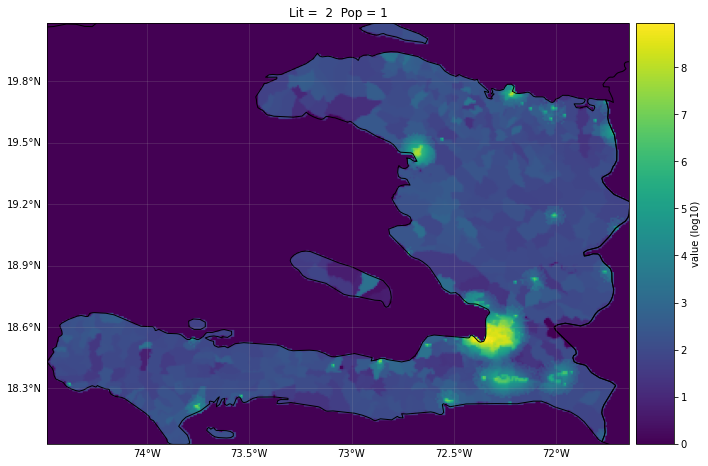

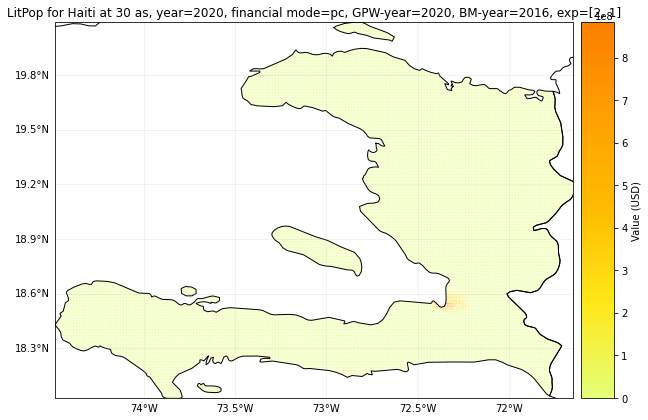

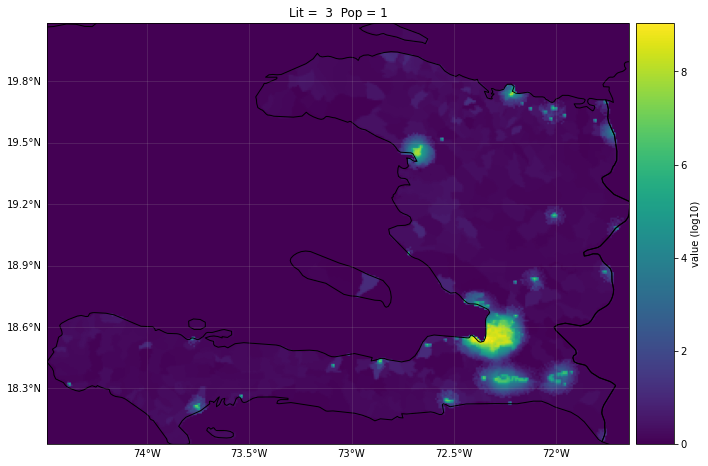

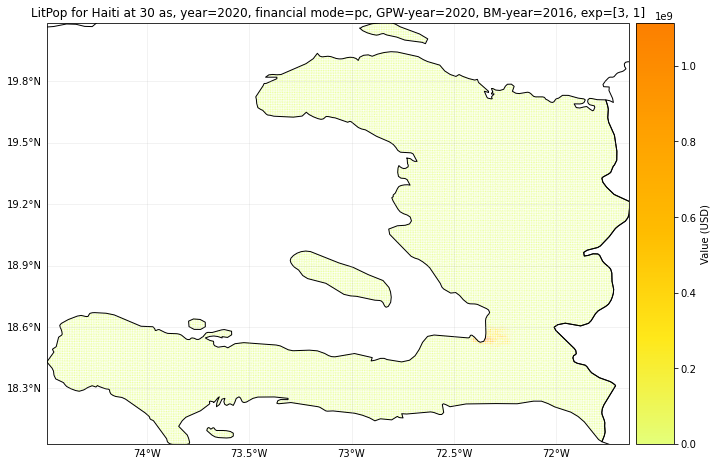

In [9]:
# These are the LitPop h5 files to be read! Specify Litpop name and corresponding exponents

Lit = 4 # Set based on the export data from litpop
Pop = 4
for i in range(0, Lit): 
    for j in range(0, Pop):
        FileName = "LP_HTI_2020_" + str(i) + "_" + str(j) + ".h5" # Set temporary file name: Change name to run gdp/income/nfw
        ExpFile = wd + Input + exposure_litpop + FileName # Set temporary file path
        if os.path.isfile(ExpFile): # Check the existence of the Litpop file
            Exp = Exposures()
            Exp.read_hdf5(ExpFile)
            Exp["if_TS"] = np.ones(len(Exp))
            # add column to temp to match the impact function - if_TC for Tropical cyclone wind and if_TS for storm surge
            # for using another hazard type, please delete the previous "if_TC or if_TS" column and add the new one.
            
            # Data plot
            plt.tight_layout()
            ExpRa = Exp.plot_raster() 
            ExpHB = Exp.plot_hexbin(pop_name = False) # Run the following lines to save output Geotiff 
            ExpRa.set_title("Lit =  " + str(i) + "  Pop = " + str(j))
            
            # Figure export
            ExpRa.figure.savefig(wd + Output + exposure_litpop + 'LP_Ras' + str(i) + str(j) + '.tif')
            ExpHB.figure.savefig(wd + Output + exposure_litpop + 'LP_Hexbin' + str(i) + str(j) + '.tif')
            # Uncomment above two lines to save the output

## Impact Assessment

In [10]:
# Impact functions. Enter path for impact function ecxel file

from climada.entity import ImpactFuncSet

imp_set = ImpactFuncSet()
imp_set.read_excel(wd + Input + 'entity_impactfunc.xlsx')

In [11]:
# CHECK CONTENTS OF IMPACT FUNCTIONS

print(imp_set.get_hazard_types())
print(imp_set.get_ids())
print(imp_set.get_func(haz_type = None, fun_id = None))

['TC', 'TS']
{'TC': [1], 'TS': [2, 3, 4, 5, 6, 7]}
{'TC': {1: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f043ea810>}, 'TS': {2: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f03edb590>, 3: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f03a7fa90>, 4: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f09aaba50>, 5: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f05a39a50>, 6: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f09aabc50>, 7: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f7f09a5fcd0>}}


### Key values

In [15]:
# Select input Litpop file 
exp = Exposures()
exp.read_hdf5(wd + Input + exposure_litpop + "LP_HTI_2020_1_1.h5")
exp["if_TS"] = np.ones(len(exp))

for y in Year:
    haz = Hazard("TC")
    haz.read_hdf5(wd + Input + tropicalcyclone + "TC_HTI_001_3012tr_" + str(y) + ".h5")
    Imp = Impact()
    Imp.calc(exp, imp_set, haz, save_mat = True)

    # CALCULATE IMPACT
    print("Impact Calculation: ") 
    print(Imp)

    # Print key values (tot value damaged and annual average impact)
    print("Total value damaged = " + str(Imp.tot_value), " annual average impact " + str(Imp.aai_agg))
    calc = Imp.calc_impact_year_set()
    print("Predicted impact per year = " + str(calc))
    # The outcome is the text without 'INFO'
    
    # Save impact as csv and xlsx
    Imp.write_csv(wd + Output + tropicalcyclone + "impact" + str(LP) + str(y) + str(track) + "_eai.csv")
    # Other data format: xlsx
    
    

2021-03-05 12:39:44,392 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/LitPop/LP_HTI_2020_1_1.h5
2021-03-05 12:39:44,475 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2020.h5
2021-03-05 12:39:44,662 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 65621 centroids.
2021-03-05 12:39:47,377 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-03-05 12:39:47,377 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
Impact Calculation: 
Total value damaged = 49474536037.9  annual average impact 4808047.6116437325
Predicted impact per year = {1990: 0.0, 1991: 0.0, 1992: 0.0, 1993: 0.0, 1994: 24.42868170258506, 1995: 0.0, 1996: 23.368178494146658, 1997: 0.0, 1998: 2713.887523752608, 1999: 0.0, 2000: 0.0, 2001

### Impact plot: 

2021-03-05 12:39:49,144 - climada.entity.exposures.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/LitPop/LP_HTI_2020_1_1.h5
2021-03-05 12:39:49,169 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2020.h5
2021-03-05 12:39:49,234 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 65621 centroids.
2021-03-05 12:39:51,847 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-03-05 12:39:51,847 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-03-05 12:39:52,161 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


2021-03-05 12:40:00,335 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2050.h5
2021-03-05 12:40:00,426 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-03-05 12:40:00,430 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-03-05 12:40:00,430 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-03-05 12:40:00,798 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


2021-03-05 12:40:08,169 - climada.hazard.base - INFO - Reading /Users/zhangwenlan/Downloads/Code/Risk-Assessment-main/Data/Input/TropicalCyclone/TC_HTI_001_3012tr_2100.h5
2021-03-05 12:40:08,252 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-03-05 12:40:08,254 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3012 events.
2021-03-05 12:40:08,255 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-03-05 12:40:08,635 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character

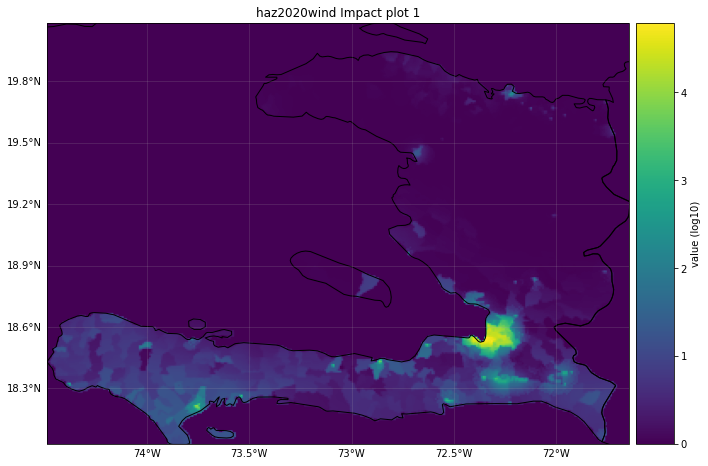

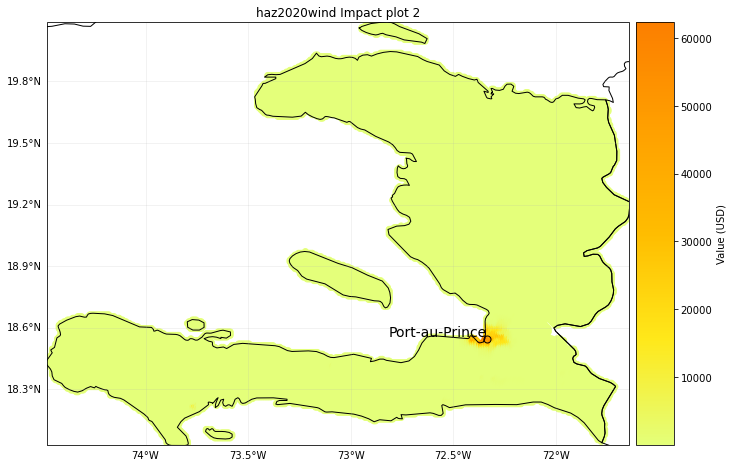

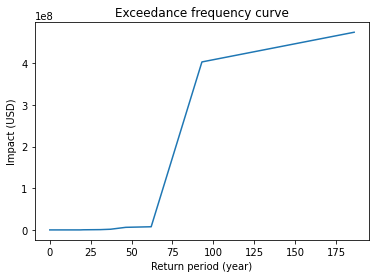

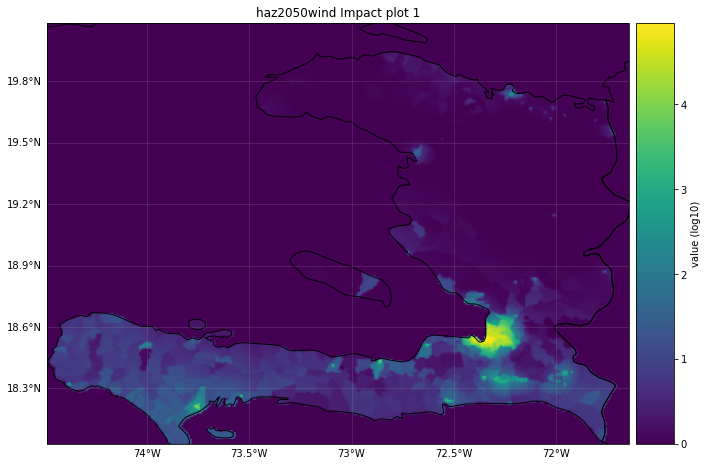

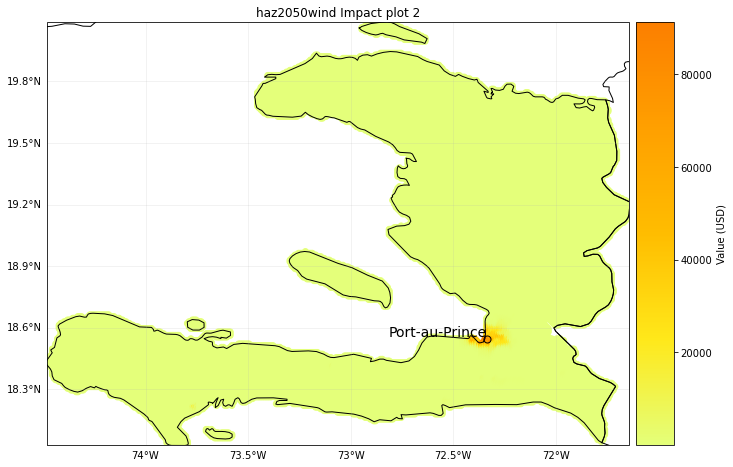

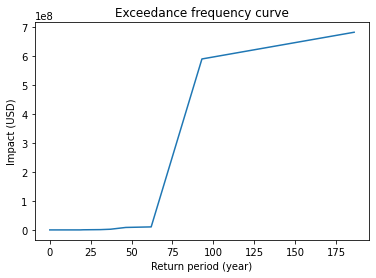

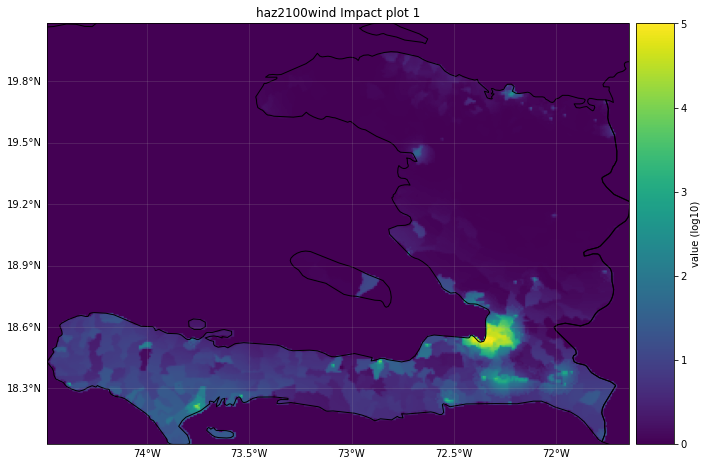

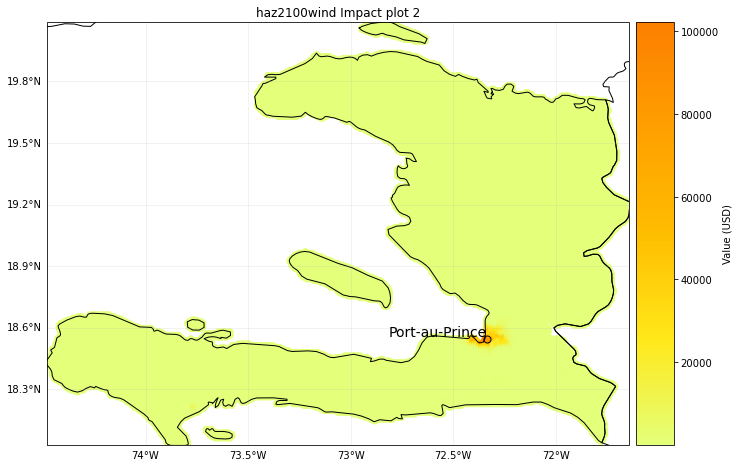

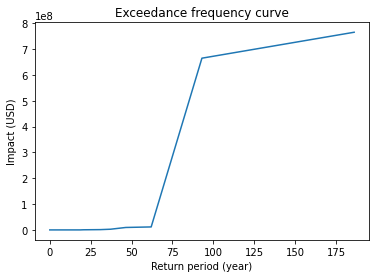

In [16]:
# Select input Litpop file 
exp = Exposures()
exp.read_hdf5(wd + Input + exposure_litpop + "LP_HTI_2020_1_1.h5")
exp["if_TS"] = np.ones(len(exp))

for y in Year:
    haz = Hazard("TC")
    haz.read_hdf5(wd + Input + tropicalcyclone + "TC_HTI_001_3012tr_" + str(y) + ".h5")
    Imp = Impact()
    Imp.calc(exp, imp_set, haz, save_mat = True)
    
    # Plot
    p1 = Imp.plot_raster_eai_exposure(save_tiff = wd + Output + exposure_litpop + "eaiexposure" + str(y) + ".tif")
    p1.set_title("haz" + str(y) + "wind Impact plot 1")
    p3 = Imp.plot_scatter_eai_exposure()
    p3.set_title("haz" + str(y) + "wind Impact plot 3")
    p4 = imp.plot_hexbin_eai_exposure(ignore_zero=True)
    p3.set_title("haz" + str(y) + "wind Impact plot 4")
    
    # Export
    p1.figure.savefig(wd + Output + tropicalcyclone + "scatter_eai_exposure1" + str(y) + ".tif")
    p3.figure.savefig(wd + Output + tropicalcyclone + "scatter_eai_exposure3" + str(y) + ".tif")
    p4.figure.savefig(wd + Output + tropicalcyclone + "scatter_eai_exposure4" + str(y) + ".tif")
    # Other figure format: png, svg
    
    # Impact exceedence curve for probabilistic events
    imp_exc_curve = Imp.calc_freq_curve() 
    imp_exc_curve.plot().figure.savefig(wd + Output + tropicalcyclone + "exce_freq_curve_PHL_" + LP + str(y) + "_eai.tif")
    # Other figure format: png, svg
    

In [38]:
# create CSV file for further potential analysis

impzip = zip(
    imp_exc_curve.impact,imp_exc_curve.return_per,
    imp_exc_curve1.impact,imp_exc_curve1.return_per,
    imp_exc_curve2.impact,imp_exc_curve1.return_per
)
impzip = pd.DataFrame(imp_exc_curve.impact,imp_exc_curve.return_per)
impzip.to_csv(outEAI+"imp_exc_curve"+LP+year+track+".csv")

In [1]:
p2 = imp.plot_basemap_impact_exposure() 
#p2.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p2.set_title("haz2100wind Impact")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".svg")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".png")

NameError: name 'imp' is not defined

In [ ]:
#imp.local_exceedance_imp()

In [ ]:
# p6 = imp.plot_hexbin_impact_exposure()
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".png")
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".svg")

In [ ]:
# imp.plot_rp_imp([10, 50, 75, 100])

In [ ]:
#from climada.engine import CostBenefit

# cost_ben = CostBenefit()
# cost_ben.calc(tc_fl, ent_fl, future_year=2060) # prints costs and benefits
# cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
# cost_ben.plot_event_view() # plot averted damage of each measure for every return period